# Navigation

### Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from collections import deque
from dqn_agent import Agent
import torch
from learn_alg import dqn

In [2]:
env = UnityEnvironment(file_name="../Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Get the default brain

In [3]:
brain_name = env.brain_names[0]
print(brain_name)
brain = env.brains[brain_name]
print(brain)

BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Random interaction with environment

### Instantiate Agent (seed 0 assumed for repeatability)

In [5]:
agent = Agent(state_size, action_size, seed=0)

### DQN Learning of agent's action-value function

In [6]:
scores = dqn(agent, brain_name, env)

Episode 100	Average Score: 0.87
Episode 200	Average Score: 4.99
Episode 300	Average Score: 7.42
Episode 400	Average Score: 10.73
Episode 500	Average Score: 12.80
Episode 511	Average Score: 13.00
Environment solved in 511 episodes!	Average Score: 13.00


Saving checkpoint at episode 511!	Average Score: 13.00
Episode 512	Average Score: 13.06
Saving checkpoint at episode 512!	Average Score: 13.06
Episode 513	Average Score: 13.09
Saving checkpoint at episode 513!	Average Score: 13.09
Episode 514	Average Score: 13.11
Saving checkpoint at episode 514!	Average Score: 13.11
Episode 518	Average Score: 13.12
Saving checkpoint at episode 518!	Average Score: 13.12
Episode 520	Average Score: 13.14
Saving checkpoint at episode 520!	Average Score: 13.14
Episode 521	Average Score: 13.14
Saving checkpoint at episode 521!	Average Score: 13.14
Episode 522	Average Score: 13.16
Saving checkpoint at episode 522!	Average Score: 13.16
Episode 523	Average Score: 13.22
Saving checkpoint at episode 523!	Average 

Episode 973	Average Score: 16.53
Saving checkpoint at episode 973!	Average Score: 16.53
Episode 1000	Average Score: 16.13
Episode 1100	Average Score: 14.87
Episode 1200	Average Score: 15.51
Episode 1300	Average Score: 16.41
Episode 1332	Average Score: 16.54
Saving checkpoint at episode 1332!	Average Score: 16.54
Episode 1336	Average Score: 16.61
Saving checkpoint at episode 1336!	Average Score: 16.61
Episode 1337	Average Score: 16.62
Saving checkpoint at episode 1337!	Average Score: 16.62
Episode 1338	Average Score: 16.66
Saving checkpoint at episode 1338!	Average Score: 16.66
Episode 1340	Average Score: 16.69
Saving checkpoint at episode 1340!	Average Score: 16.69
Episode 1343	Average Score: 16.73
Saving checkpoint at episode 1343!	Average Score: 16.73
Episode 1400	Average Score: 16.17
Episode 1495	Average Score: 16.74
Saving checkpoint at episode 1495!	Average Score: 16.74
Episode 1500	Average Score: 16.67
Episode 1600	Average Score: 15.80
Episode 1656	Average Score: 16.78
Saving che

### Plot the scores

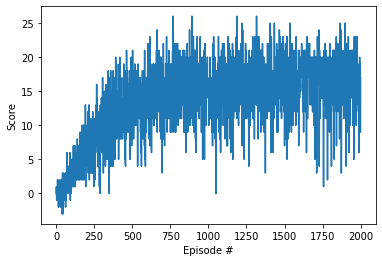

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Test Agent learning outcomes using action value function learnt before (3 test runs)

In [8]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state)                      # select an action
        action = action.astype(int)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))


Score: 23.0
Score: 16.0
Score: 17.0


### Close environment

In [9]:
env.close()